In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [2]:
dataset = pd.read_csv("rawdata.csv")
dataset

,SAMPLE_ID,snp_0,snp_1,snp_2,snp_3,snp_4,snp_5,snp_6,snp_7,snp_8,snp_9,snp_10,snp_11,snp_12,snp_13,snp_14,snp_15,snp_16,snp_17,snp_18,snp_19,snp_20,snp_21,snp_22,snp_23,snp_24,snp_25,snp_26,snp_27,snp_28,snp_29,snp_30,snp_31,snp_32,snp_33,snp_34,snp_35,snp_36,snp_37,snp_38,...,snp_9962,snp_9963,snp_9964,snp_9965,snp_9966,snp_9967,snp_9968,snp_9969,snp_9970,snp_9971,snp_9972,snp_9973,snp_9974,snp_9975,snp_9976,snp_9977,snp_9978,snp_9979,snp_9980,snp_9981,snp_9982,snp_9983,snp_9984,snp_9985,snp_9986,snp_9987,snp_9988,snp_9989,snp_9990,snp_9991,snp_9992,snp_9993,snp_9994,snp_9995,snp_9996,snp_9997,snp_9998,snp_9999,snp_10000,STATUS
0,HCB181,1,0,0,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,0,0,2,2,2,2,1,1,2,2,2,2,2,2,0,0,0,0,2,2,...,1,2,2,1,2,1,2,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,1,2,1,2,1
1,HCB182,1,0,0,1,1,2,2,1,2,2,2,1,2,1,2,2,2,2,2,0,0,2,2,2,2,2,2,1,1,1,2,0,0,0,0,0,0,2,2,...,1,2,2,1,2,1,2,2,1,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,1,1,2,2,2,1,2,2,2,2
2,HCB183,1,0,0,1,2,2,2,1,2,2,2,1,2,1,1,2,2,2,2,0,0,2,2,2,2,1,2,1,2,1,2,2,2,0,0,0,0,2,2,...,1,2,2,2,2,1,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,1,1,2,2,2,1,2,2,2,1,2,2
3,HCB184,1,0,0,1,1,2,2,1,2,2,2,1,1,2,2,2,2,2,2,0,0,2,2,2,2,1,1,2,2,2,2,2,2,0,0,0,0,2,2,...,1,1,1,1,2,1,2,1,1,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,2,2,2,1,2,2
4,HCB185,1,0,0,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,1,2,...,1,1,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,1,2,2,2,2,2,1,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,JPT265,1,0,0,1,1,1,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,1,2,2,1,1,2
85,JPT266,1,0,0,1,2,2,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,1,2,2,2,1,2,2,2,1,2,...,1,1,2,1,2,1,2,1,1,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,2,2,2,1,2,2
86,JPT267,1,0,0,1,2,1,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2,0,0,0,0,1,2,2,2,2,2,0,0,2,2,2,2,1,2,...,1,1,2,1,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,1,1,2,2,1
87,JPT268,1,0,0,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,...,1,2,2,1,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,1,2,1,1,1


In [3]:
dataset = dataset.drop(["SAMPLE_ID"], axis=1)

In [4]:
x = dataset.drop(['STATUS'], axis=1)
y = dataset[['STATUS']]

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((71, 10001), (71, 1), (18, 10001), (18, 1))

In [7]:
x_train = x_train.values.reshape(-1, 10001, 1)
x_test = x_test.values.reshape(-1, 10001, 1)
x_train.shape, x_test.shape

((71, 10001, 1), (18, 10001, 1))

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
model = Sequential()
model.add(Conv1D(16, kernel_size=3, activation='relu', input_shape=(10001, 1)))
model.add(Conv1D(16, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Dropout(0.2))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(Conv1D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(500, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [10]:
model.compile(optimizer='Adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

In [12]:
history = model.fit(x_train, y_train, epochs=50, batch_size=10, validation_data=(x_val, y_val))
history

Epoch 1/50
6/6 [==============================] - 17s 354ms/step - loss: 2.8728 - accuracy: 0.6112 - val_loss: 0.8811 - val_accuracy: 0.4000
Epoch 2/50
6/6 [==============================] - 1s 194ms/step - loss: 0.9269 - accuracy: 0.4968 - val_loss: 0.7814 - val_accuracy: 0.4000
Epoch 3/50
6/6 [==============================] - 1s 192ms/step - loss: 0.7966 - accuracy: 0.4930 - val_loss: 0.6874 - val_accuracy: 0.6000
Epoch 4/50
6/6 [==============================] - 1s 198ms/step - loss: 0.6803 - accuracy: 0.5743 - val_loss: 0.7477 - val_accuracy: 0.4000
Epoch 5/50
6/6 [==============================] - 1s 190ms/step - loss: 0.7124 - accuracy: 0.5115 - val_loss: 0.7424 - val_accuracy: 0.4000
Epoch 6/50
6/6 [==============================] - 1s 195ms/step - loss: 0.6985 - accuracy: 0.5341 - val_loss: 0.7284 - val_accuracy: 0.6000
Epoch 7/50
6/6 [==============================] - 1s 190ms/step - loss: 0.6950 - accuracy: 0.4718 - val_loss: 0.7252 - val_accuracy: 0.6000
Epoch 8/50
6/6 [===

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 9999, 16)          64        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 9997, 16)          784       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2499, 16)          0         
_________________________________________________________________
dropout (Dropout)            (None, 2499, 16)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2497, 32)          1568      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2495, 32)          3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 623, 32)           0

In [14]:
accuracy = model.evaluate(x_val, y_val)
print("Accuracy: ", accuracy[1])

1/1 [==============================] - 0s 62ms/step - loss: 1.4582 - accuracy: 0.6000
Accuracy:  0.6000000238418579


In [15]:
def plot_learning_curve(history):
    plt.figure(figsize=(8,8))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

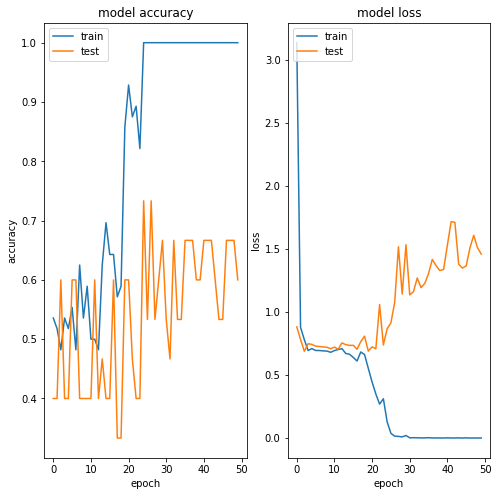

In [16]:
plot_learning_curve(history)